# Variationsrechnung: Beispiel Brachystochrone

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-636652zz because the default path (/home/jupyter-stiw/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
g = 9.81

def f(t,x,y,dy):
    return np.sqrt((2*g*y(x))/(1+dy(x)**2))

In [3]:
b = 60/100
B = 20/100

Gerade

In [4]:
# 1. Kurve
def y1(x):
    return x/b*B
def dy1(x):
    return np.ones_like(x)/b*B

Flach zu steile Kurve

In [5]:
# 2. Kurve
def y2(x):
    return x**2/b**2*B
def dy2(x):
    return 2*x/b**2*B

mit Verschiebung:

In [6]:
# 2. Kurve
p = 2
def y2(x,m=-50/100):
    return (B*(-(-m)**p + (-m + x)**p))/((b - m)**p - (-m)**p)
def dy2(x,m=-50/100):
    return (B*p*(-m + x)**(-1 + p))/((b - m)**p - (-m)**p)

Steil zu flach Kurve

In [7]:
# 3. Kurve
p = 2
def y3(x):
    return x**(1/p)/b**(1/p)*B
def dy3(x):
    return 1/p*x**(1/p-1)/b**(1/p)*b

mit Verschiebung

In [9]:
# 3. Kurve
def y3(x,m=-10/100):
    return -(B*(b - m)*x)/(b*(m - x))
def dy3(x,m=-10/100):
    return -(B*(b - m))/(b*(m - x)) + (B*(b - m)*x)/(b*(m - x)**2)

Brachystochrone

In [10]:
fsb = lambda sb : (sb - np.sin(sb))/(1-np.cos(sb))
from scipy.optimize import fsolve
sb = fsolve(lambda s: fsb(s)-b/B,5)[0]
r = B/(1-np.cos(sb))
print('r=',r,'sb=',sb)

r= 0.12393740530889391 sb= 4.051628024117108


Parametrische Darstellung

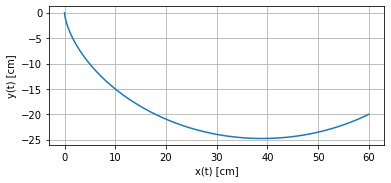

In [11]:
si = np.linspace(0,sb,400)

plt.plot(r*(si-np.sin(si))*100,-r*(1-np.cos(si))*100)
plt.gca().set_aspect(1)
plt.grid()
plt.xlabel('x(t) [cm]')
plt.ylabel('y(t) [cm]')
plt.show()

Definition der Kurve für Anfangswertproblem:

In [12]:
# 4. Kurve
def y4(x):
    # Berechnung von s(x)
    def f(si):
        return r*(si-np.sin(si))-x
    si = fsolve(f,1)[0]
    # y(s(x))
    return r*(1-np.cos(si))

def dy4(x):
    # Berechnung von s(x)
    def f(si):
        return r*(si-np.sin(si))-x
    si = fsolve(f,1)[0]
    # y'(s(x))*s'(x)
    return (np.sin(si))/(1-np.cos(si))

Vergleich der Kurven:

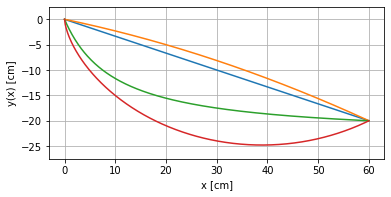

In [13]:
xi = np.linspace(0,b,400)
plt.plot(xi*100,-y1(xi)*100)
plt.plot(xi*100,-y2(xi,m=-50/100)*100)
plt.plot(xi*100,-y3(xi,m=-10/100)*100)
plt.plot(xi*100,[-y4(xi)*100 for xi in xi])
plt.ylim(-27.5,2.5)
plt.grid()
plt.gca().set_aspect(1)
plt.xlabel('x [cm]')
plt.ylabel('y(x) [cm]')
plt.show()

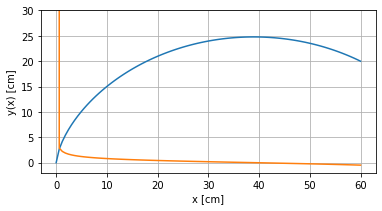

In [14]:
plt.plot(np.linspace(0,b,100)*100,[y4(xi)*100 for xi in np.linspace(0,b,100)])
plt.plot(np.linspace(0,b,100)*100,[dy4(xi) for xi in np.linspace(0,b,100)])
plt.ylim(-2,30)
plt.grid()
plt.gca().set_aspect(1)
plt.xlabel('x [cm]')
plt.ylabel('y(x) [cm]')
plt.show()

Wir wollen das Anfangswertproblem nur so lange rechnen wie $x<b$ gilt:

In [15]:
def hit_pos(t,x):
    return b-x
hit_pos.terminal = True
hit_pos.direction = -1

In [23]:
ti = np.linspace(0,2,10000)

Für den Startwert $x(0) = 0$ erhalten wir die konstante Lösung $y \equiv 0$ (instabilier Gleichgewichtspunkt). Daher stören wir den Startwert ganz leicht $x(0) = 10^{-4}$.

In [24]:
sol1 = solve_ivp(lambda t,x: f(t,x,y1,dy1), [0,2], np.array([1e-4]),events=hit_pos,t_eval=ti)
sol2 = solve_ivp(lambda t,x: f(t,x,y2,dy2), [0,2], np.array([1e-4]),events=hit_pos,t_eval=ti)
sol3 = solve_ivp(lambda t,x: f(t,x,y3,dy3), [0,2], np.array([1e-4]),events=hit_pos,t_eval=ti)
sol4 = solve_ivp(lambda t,x: f(t,x,y4,dy4), [0,2], np.array([1e-4]),events=hit_pos,t_eval=ti)

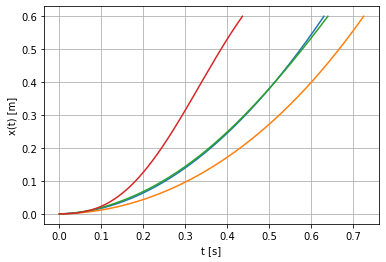

In [25]:
plt.plot(sol1.t,sol1.y[0])
plt.plot(sol2.t,sol2.y[0])
plt.plot(sol3.t,sol3.y[0])
plt.plot(sol4.t,sol4.y[0])
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('x(t) [m]')
plt.show()

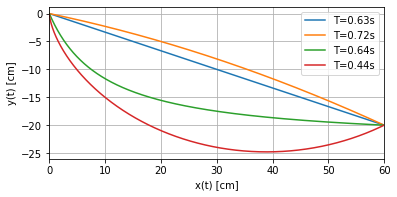

In [27]:
plt.plot(sol1.y[0]*100,-y1(sol1.y[0])*100,label='T='+str(np.round(sol1.t[-1],2))+'s')
plt.plot(sol2.y[0]*100,-y2(sol2.y[0])*100,label='T='+str(np.round(sol2.t[-1],2))+'s')
plt.plot(sol3.y[0]*100,-y3(sol3.y[0])*100,label='T='+str(np.round(sol3.t[-1],2))+'s')
plt.plot(sol4.y[0]*100,[-y4(xi)*100 for xi in sol4.y[0]],label='T='+str(np.round(sol4.t[-1],2))+'s')
#plt.plot(r*(si-np.sin(si))*100,-r*(1-np.cos(si))*100,'-.')
plt.legend(loc=1)
plt.xlim(0,b*100)
#plt.ylim(-B,0)
plt.gca().set_aspect(1)
plt.xlabel('x(t) [cm]')
plt.ylabel('y(t) [cm]')
plt.grid()
plt.show()